In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **Data Wrangling**

Students in Charge: <br>
1211109997, TAN ZHI HENG <br>
1211110647, CHONG ZHI TIAN

In [2]:
# Load the dataset into a Pandas DataFrame.

df = pd.read_csv('datasets/BankChurners.csv')

### **Dataset Properties**

In [3]:
# Number of rows and columns

print("Dataset shape (rows, columns):", df.shape)

Dataset shape (rows, columns): (10127, 23)


In [4]:
# Drop Naive_Bayes column as stated in Kaggle (dataset description)

df = df.drop(columns=[
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
], errors='ignore')

In [5]:
# Data types of each column

print("Data types:", df.dtypes)

Data types: CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object


In [6]:
# Check for missing values in each column

print("Missing values per column:", df.isnull().sum())

Missing values per column: CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


### **Data Quality**

In [7]:
# Handle data quality issues:
# Identify and address missing values.

print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


In [8]:
# Detect and correct incorrect or invalid data.

# Check if Customer_Age has invalid values

print("\nInvalid ages:")
print(df[(df['Customer_Age'] < 18) | (df['Customer_Age'] > 100)])


Invalid ages:
Empty DataFrame
Columns: [CLIENTNUM, Attrition_Flag, Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio]
Index: []

[0 rows x 21 columns]


In [9]:
# Check if Credit_Limit has negative value

print("\nNegative Credit_Limit:")
print(df[df['Credit_Limit'] < 0])


Negative Credit_Limit:
Empty DataFrame
Columns: [CLIENTNUM, Attrition_Flag, Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio]
Index: []

[0 rows x 21 columns]


In [10]:
# Check is Total_Trans_Ct has negative value

print("\nNegative Total_Trans_Ct:")
print(df[df['Total_Trans_Ct'] < 0])


Negative Total_Trans_Ct:
Empty DataFrame
Columns: [CLIENTNUM, Attrition_Flag, Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio]
Index: []

[0 rows x 21 columns]


In [11]:
# Handle duplicate entries if applicable.

duplicate_count = df.duplicated().sum()

print("Number of duplicate rows:\n", duplicate_count)

Number of duplicate rows:
 0


### **Data Enhancement**

In [12]:
# Create new features (e.g., categorical encoding, time-based aggregations).

df['Years_on_book'] = df['Months_on_book'] / 12

print(df[['Months_on_book', 'Years_on_book']].head())

   Months_on_book  Years_on_book
0              39       3.250000
1              44       3.666667
2              36       3.000000
3              34       2.833333
4              21       1.750000


## **Exploratory Data Analysis**

Students in Charge: <br>
1221301131, MUHAMMAD ARIFF RIDZLAN BIN MOHD FAUDZI <br>
1211103754, NOOR ALIA ALISA BINTI KAMAL

### **Summary Statistics**

In [13]:
# Summary statistics for numerical variables

print("Summary statistics for numerical variables:\n")

df.describe().T

Summary statistics for numerical variables:



,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,7.080821e+08,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,2.600000e+01,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,1.300000e+01,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1.438300e+03,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.000000e+00,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.000000e+00,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


In [14]:
# Summary statistics for categorical variables

print("Summary statistics for categorical variables:\n")

df.select_dtypes('object').describe().T

Summary statistics for categorical variables:



,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


### **Correlation Analysis**

In [15]:
# Apply correlation analysis to detect relationships between variables.

numerical_cols = [
    'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
    'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
    'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
]

df_numerical = df[numerical_cols]
corr_matrix = df_numerical.corr()

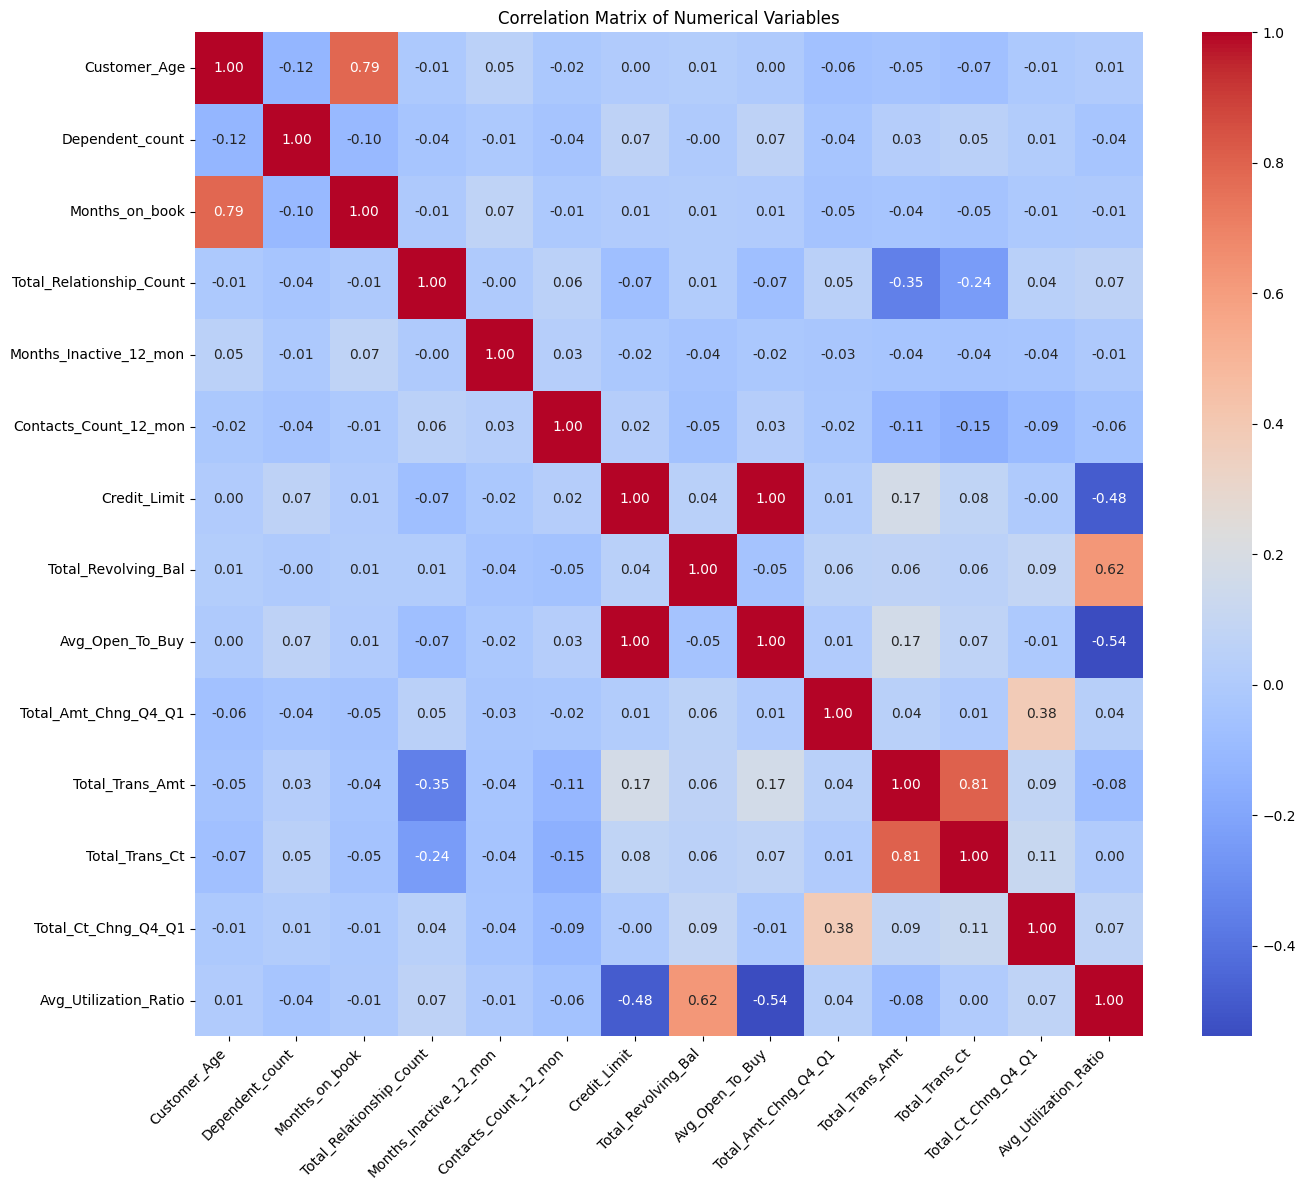

In [16]:
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 10})
plt.title('Correlation Matrix of Numerical Variables')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Hypothesis Testing**

In [17]:
# Hypotheses:
# H0 (Null Hypothesis): There is no significant difference in the mean of the feature between customers who churned and those who did not.
# H1 (Alternative Hypothesis): There is a significant difference in the mean of the feature between customers who churned and those who do not.
from scipy import stats

# Define churned with 0: not churn, 1: churn
df['Churned'] = df['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

# Define numeric columns
numerical_cols = [
    'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
    'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
    'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
]

# Loop through each numeric column and perform t-test
for col in numerical_cols:
    churned = df[df['Churned'] == 1][col]
    nonchurned = df[df['Churned'] == 0][col]

    t_stat, p_value = stats.ttest_ind(nonchurned, churned, equal_var=False)

    print(f"\nTwo-Sample t-Test (Churned vs Non-Churned) on {col}:")
    print(f"t-statistic = {t_stat:.4f}")
    print(f"p-value     = {p_value:.4f}")

    alpha = 0.05
    if p_value < alpha:
        print("Conclusion: Significant difference in mean (reject H₀)")
    else:
        print("Conclusion: No significant difference in mean (fail to reject H₀)")


Two-Sample t-Test (Churned vs Non-Churned) on Customer_Age:
t-statistic = -1.8988
p-value     = 0.0577
Conclusion: No significant difference in mean (fail to reject H₀)

Two-Sample t-Test (Churned vs Non-Churned) on Dependent_count:
t-statistic = -1.9398
p-value     = 0.0525
Conclusion: No significant difference in mean (fail to reject H₀)

Two-Sample t-Test (Churned vs Non-Churned) on Months_on_book:
t-statistic = -1.4042
p-value     = 0.1604
Conclusion: No significant difference in mean (fail to reject H₀)

Two-Sample t-Test (Churned vs Non-Churned) on Total_Relationship_Count:
t-statistic = 14.9445
p-value     = 0.0000
Conclusion: Significant difference in mean (reject H₀)

Two-Sample t-Test (Churned vs Non-Churned) on Months_Inactive_12_mon:
t-statistic = -16.8619
p-value     = 0.0000
Conclusion: Significant difference in mean (reject H₀)

Two-Sample t-Test (Churned vs Non-Churned) on Contacts_Count_12_mon:
t-statistic = -20.9014
p-value     = 0.0000
Conclusion: Significant differ

In [18]:
#------------------------------------- Income Category -------------------------------------#
# Hypotheses:
# H0 (Null Hypothesis): There is no significant difference in the mean churn rate between low and high income groups.
# H1 (Alternative Hypothesis): There is a significant difference in the mean churn rate between low and high income groups.

# Grouping Income into two categories
low_income = ['Less than $40K', '$40K - $60K']
high_income = ['$60K - $80K', '$80K - $120K', '$120K +']

# Filter churn status for each group
low = df[df['Income_Category'].isin(low_income)]['Churned']
high = df[df['Income_Category'].isin(high_income)]['Churned']

# Perform independent two-sample t-test (Welch’s t-test)
t_stat, p_val = stats.ttest_ind(low, high, equal_var=False)

# Display results
print("Two-Sample t-Test: Churn Rate by Income Group\n")
print(f"Low Income Mean Churn Rate  = {low.mean():.4f}")
print(f"High Income Mean Churn Rate = {high.mean():.4f}")
print(f"T-statistic                 = {t_stat:.4f}")
print(f"p-value                     = {p_val:.4f}")

alpha = 0.05
if p_val < alpha:
    print("Conclusion: Significant difference in churn rate between low and high income groups (Reject H₀)")
else:
    print("Conclusion: No significant difference in churn rate between low and high income groups (Fail to reject H₀)\n")

#------------------------------------- Gender -------------------------------------#
# Hypotheses:
# H0 (Null Hypothesis): There is no significant difference in the mean churn rate between male and female customers.
# H1 (Alternative Hypothesis): There is a significant difference in the mean churn rate between male and female customers.

# Extract churn status by gender
male = df[df['Gender'] == 'M']['Churned']
female = df[df['Gender'] == 'F']['Churned']

# Perform t-test
t_stat, p_val = stats.ttest_ind(male, female, equal_var=False)

# Display results
print("Two-Sample t-Test: Churn Rate by Gender\n")
print(f"Male Churn Rate   = {male.mean():.4f}")
print(f"Female Churn Rate = {female.mean():.4f}")
print(f"T-statistic       = {t_stat:.4f}")
print(f"p-value           = {p_val:.4f}")

alpha = 0.05
if p_val < alpha:
    print("Conclusion: Significant difference in churn rate between male and female customers (Reject H₀)")
else:
    print("Conclusion: No significant difference in churn rate between male and female customers (Fail to reject H₀)")

Two-Sample t-Test: Churn Rate by Income Group

Low Income Mean Churn Rate  = 0.1650
High Income Mean Churn Rate = 0.1520
T-statistic                 = 1.6647
p-value                     = 0.0960
Conclusion: No significant difference in churn rate between low and high income groups (Fail to reject H₀)

Two-Sample t-Test: Churn Rate by Gender

Male Churn Rate   = 0.1462
Female Churn Rate = 0.1736
T-statistic       = -3.7682
p-value           = 0.0002
Conclusion: Significant difference in churn rate between male and female customers (Reject H₀)


### **Customer Tenure vs Churn Rate Analysis**

Customer count by tenure group:
Group_Bin
[0, 6)         0
[6, 12)        0
[12, 18)     188
[18, 24)     499
[24, 30)    1233
[30, 36)    1882
[36, 42)    4139
[42, 48)    1369
[48, 54)     619
[54, 60)     198
Name: count, dtype: int64


/tmp/ipykernel_2589080/2154392778.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = df.groupby('Group_Bin')['Churned'].mean().reset_index()


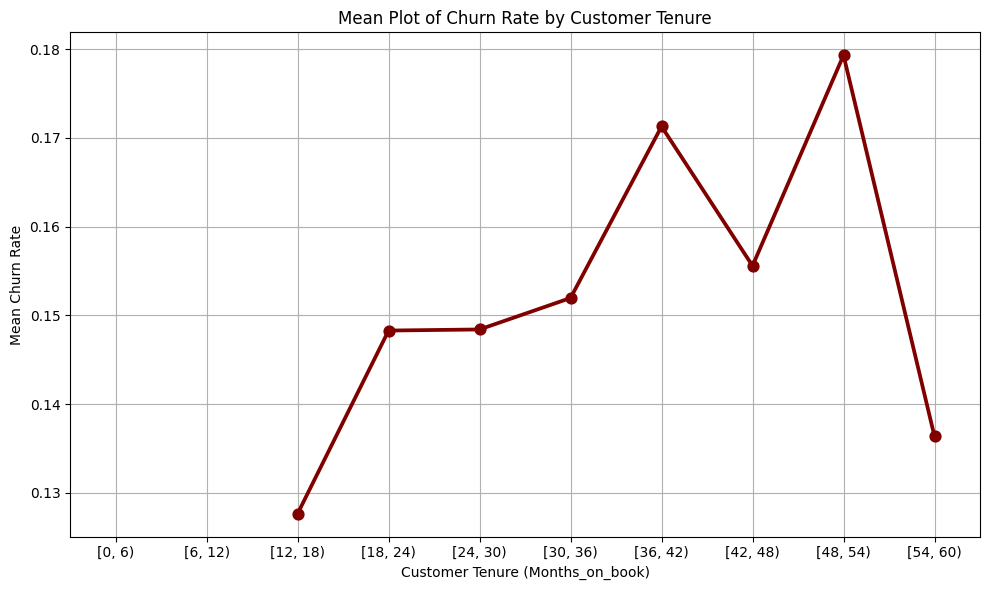

In [19]:
# Bin the 'Months_on_book' into intervals every 6 months
df['Group_Bin'] = pd.cut(df['Months_on_book'], bins=[0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60], right=False)

# Count customers in each tenure group
tenure_counts = df['Group_Bin'].value_counts().sort_index()

# Display the count
print("Customer count by tenure group:")
print(tenure_counts)

# Group by bin and compute mean churn rate
tenure_churn = df.groupby('Group_Bin')['Churned'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=tenure_churn, x='Group_Bin', y='Churned', color='maroon', marker='o')
plt.title("Mean Plot of Churn Rate by Customer Tenure")
plt.xlabel("Customer Tenure (Months_on_book)")
plt.ylabel("Mean Churn Rate")
plt.grid(True)
plt.tight_layout()
plt.show()

### **Univariate Analysis**

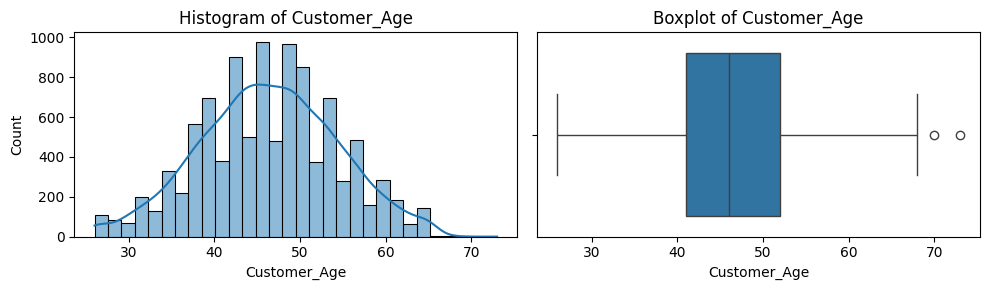

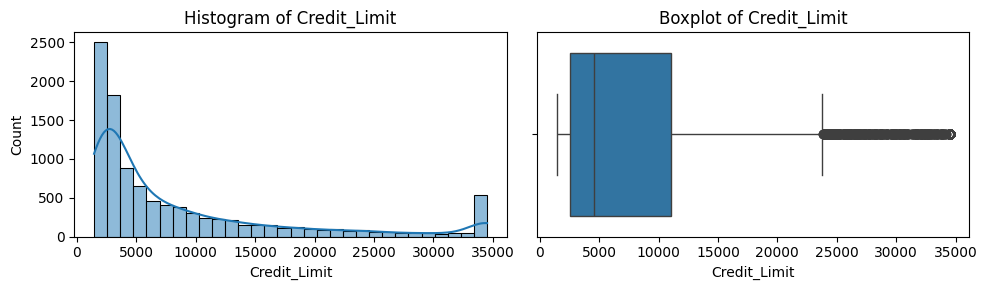

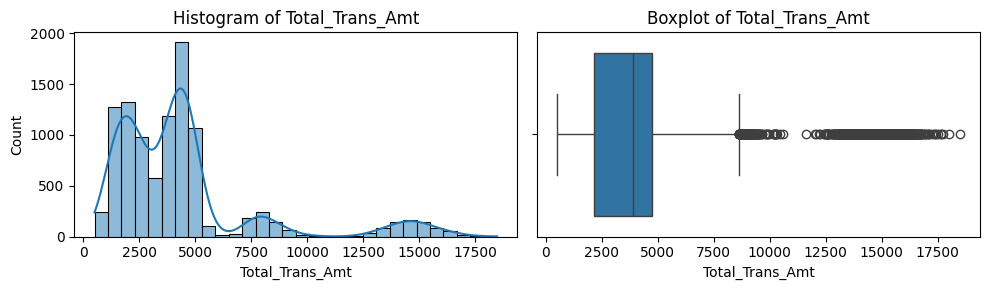

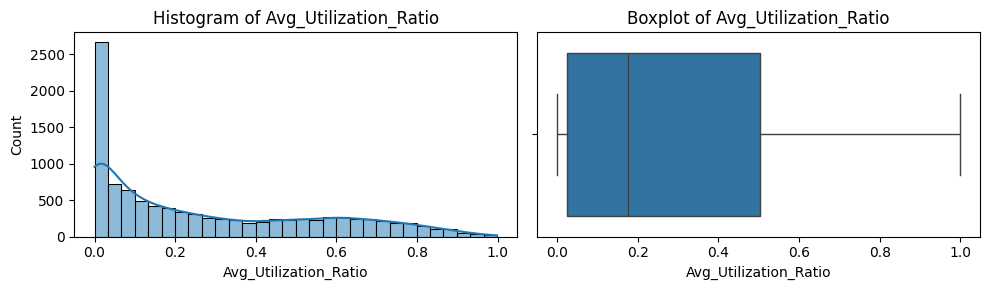

In [20]:
cols = ['Customer_Age', 'Credit_Limit', 'Total_Trans_Amt', 'Avg_Utilization_Ratio']

for col in cols:
    plt.figure(figsize=(10, 3))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

### **Multivariate Analysis**

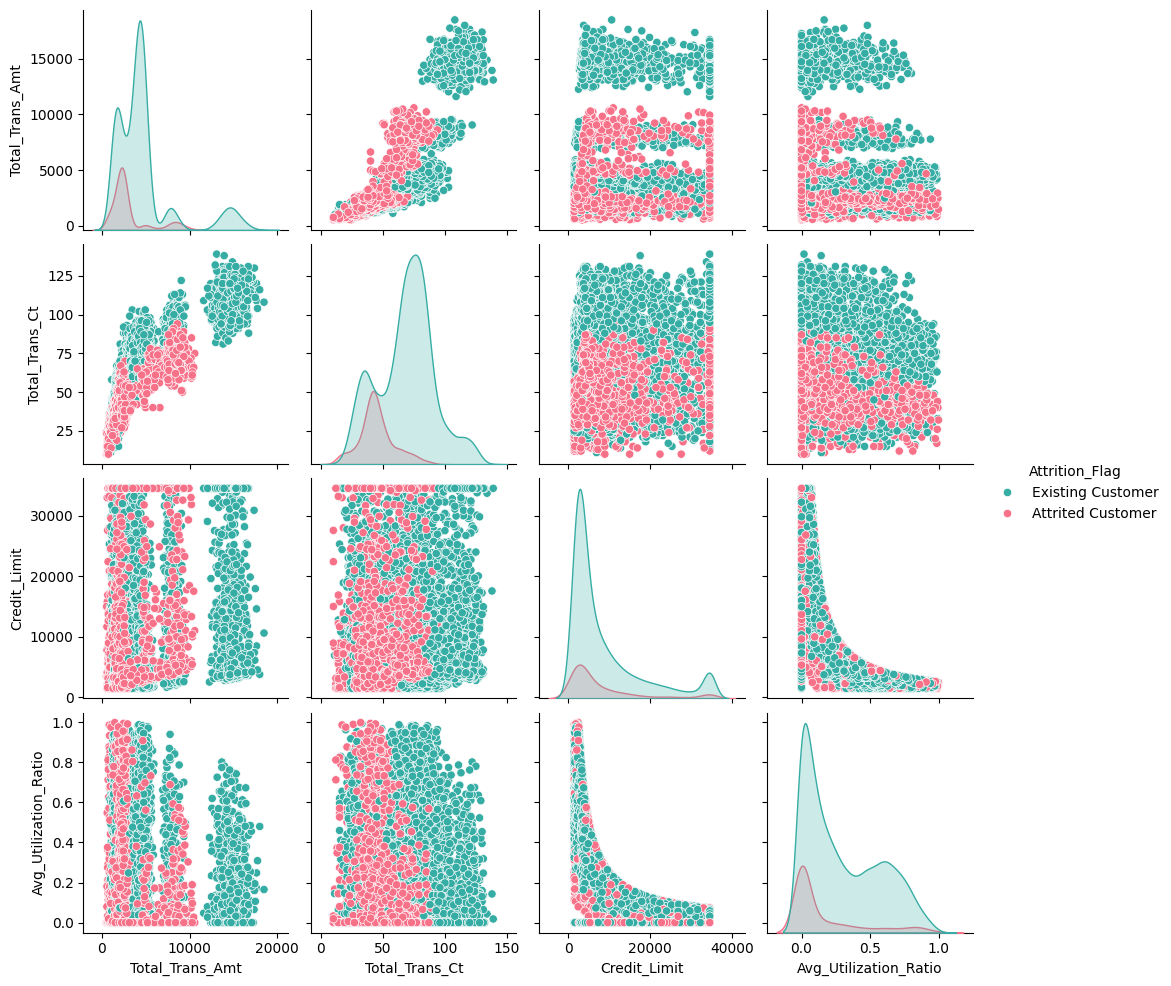

In [21]:
selected_features = ['Total_Trans_Amt', 'Total_Trans_Ct', 'Credit_Limit', 'Avg_Utilization_Ratio', 'Attrition_Flag']

sns.pairplot(df[selected_features], hue='Attrition_Flag', palette=sns.color_palette('husl', 2)[::-1])

plt.show()

## **Data Visualisation**

Chart by 1221301131, MUHAMMAD ARIFF RIDZLAN BIN MOHD FAUDZI

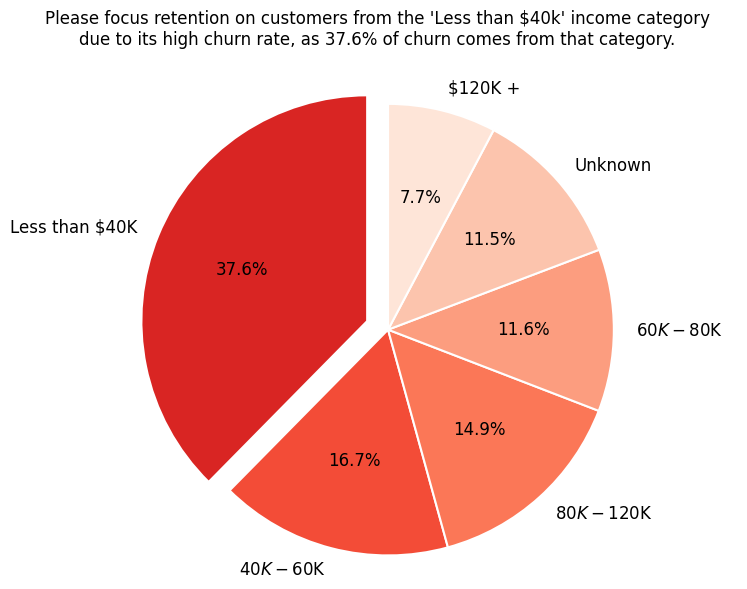

In [22]:
churned_df = df[df['Attrition_Flag'] == 'Attrited Customer']
income_counts = churned_df['Income_Category'].value_counts()
income_counts = income_counts.sort_values(ascending=False)

explode = [0.1] + [0]*(len(income_counts)-1)
colors = plt.cm.Reds(np.linspace(0.1, 0.7, len(income_counts)))[::-1]

plt.figure(figsize=(8, 6))
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%',
        startangle=90, explode=explode, colors=colors, textprops={'fontsize': 12},
        wedgeprops={'edgecolor': 'w', 'linewidth': 1.5, 'linestyle': 'solid'}
)

title_line1 = "Please focus retention on customers from the 'Less than $40k' income category"
title_line2 = "due to its high churn rate, as 37.6% of churn comes from that category."

plt.title(f"{title_line1}\n{title_line2}", fontsize=12, pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

Chart by 1211103754, NOOR ALIA ALISA BINTI KAMAL

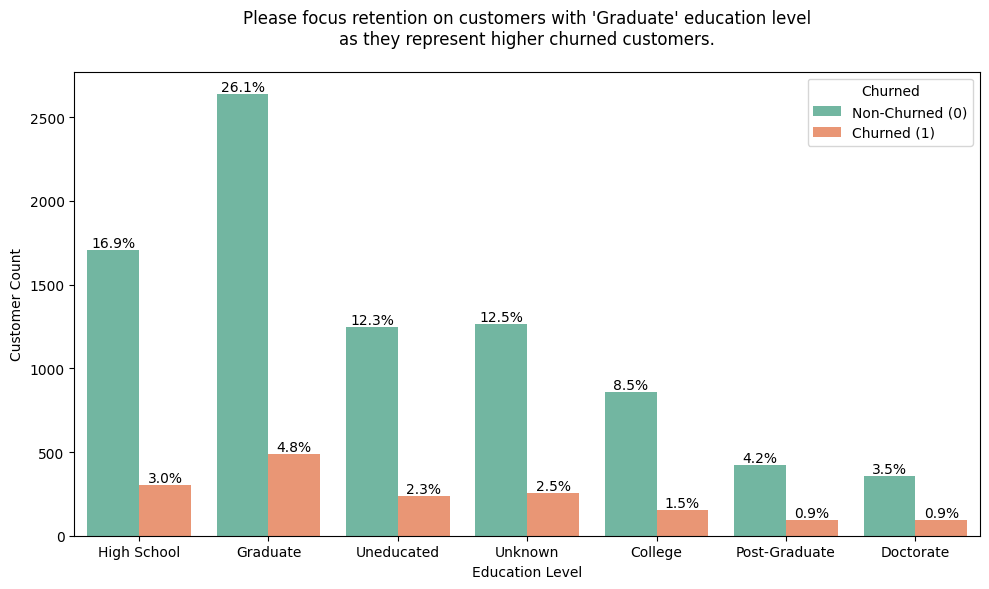

In [23]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Education_Level', hue='Churned', palette='Set2')

# Add percentages on top of each bar
for container in ax.containers:
    # Calculate percentages for each bar
    labels = [f'{(v.get_height() / len(df)) * 100:.1f}%' if v.get_height() > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=10)

title_line1 = "Please focus retention on customers with 'Graduate' education level"
title_line2 = "as they represent higher churned customers."

plt.title(f"{title_line1}\n{title_line2}", fontsize=12, pad=20)
plt.xlabel('Education Level')
plt.ylabel('Customer Count')
plt.legend(title='Churned', labels=['Non-Churned (0)', 'Churned (1)'])
plt.tight_layout()
plt.show()

Chart by 1211109997, TAN ZHI HENG

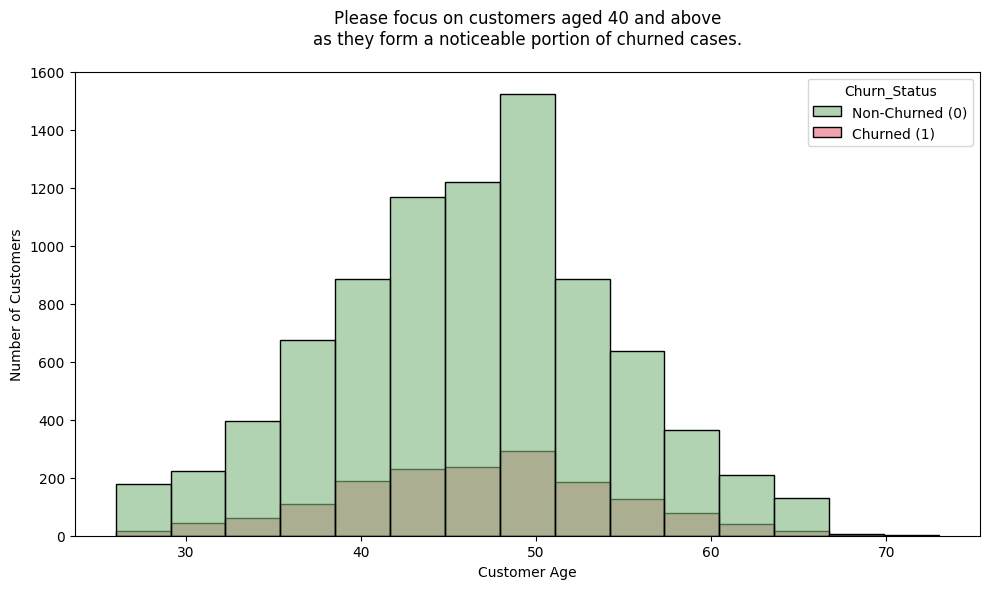

In [24]:
# Map churn status to readable labels
df['Churn_Status'] = df['Churned'].map({0: 'Non-Churned (0)', 1: 'Churned (1)'})

plt.figure(figsize=(10, 6))

# Create histogram
sns.histplot(
    data=df,
    x='Customer_Age',
    hue='Churn_Status',
    bins=15,
    palette={'Non-Churned (0)': '#7FB77E', 'Churned (1)': '#E96479'},
    alpha=0.6
)

# Friend-style title
title_line1 = "Please focus on customers aged 40 and above"
title_line2 = "as they form a noticeable portion of churned cases."

plt.title(f"{title_line1}\n{title_line2}", fontsize=12, pad=20)
plt.xlabel('Customer Age')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

Chart by 1211110647, CHONG ZHI TIAN

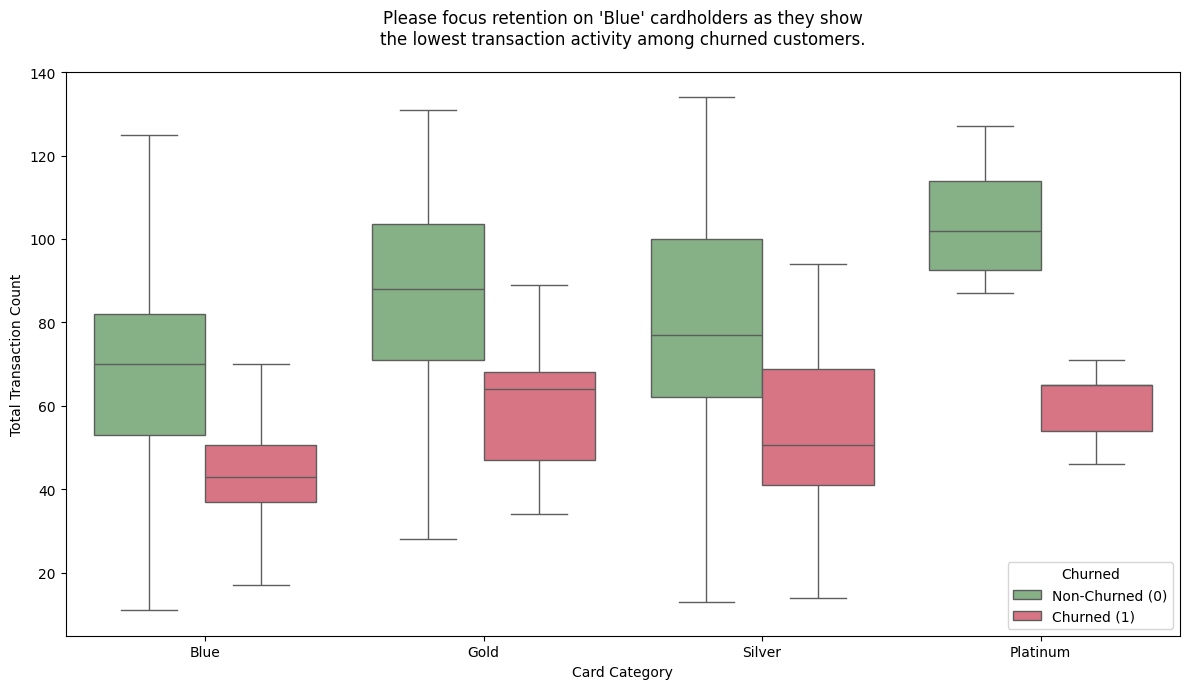

In [25]:
# Map Churned to text labels for consistent legend control
df['Churn_Status'] = df['Churned'].map({0: 'Non-Churned (0)', 1: 'Churned (1)'})

# Set custom colors
custom_palette = {'Non-Churned (0)': '#7FB77E', 'Churned (1)': '#E96479'}  # green and red

plt.figure(figsize=(12, 7))
ax = sns.boxplot(
    data=df,
    x='Card_Category',
    y='Total_Trans_Ct',
    hue='Churn_Status',
    palette=custom_palette,
    showfliers=False  # ✅ This hides the outlier dots
)

# Friend-style title lines
title_line1 = "Please focus retention on 'Blue' cardholders as they show"
title_line2 = "the lowest transaction activity among churned customers."

plt.title(f"{title_line1}\n{title_line2}", fontsize=12, pad=20)
plt.xlabel('Card Category')
plt.ylabel('Total Transaction Count')
plt.legend(title='Churned')
plt.tight_layout()
plt.show()
